## Helper Functions

In [14]:
import time
import numpy as np
import math

def hybrid_mergesort(arr: list, start: int, end: int, thresh: int):
    # IN PLACE SORTING
    if start >= end:
        return

    if end-start+1 <= thresh:
        insertionsort(arr, start, end)
        return

    if end >= start + 2:
        mid = (start+end) // 2
        hybrid_mergesort(arr, start, mid, thresh)
        hybrid_mergesort(arr, mid+1, end, thresh)

    merge(arr, start, end)

def mergesort(arr: list, start: int, end: int):
    # IN PLACE SORTING

    if start >= end:
        return

    if end >= start + 2:
        mid = (start+end) // 2
        mergesort(arr, start, mid)
        mergesort(arr, mid+1, end)

    merge(arr, start, end)

def merge(arr: list, start: int, end: int):
    if start >= end:
        return

    mid = start + (end-start) // 2
    start2 = mid + 1

    while start <= mid and start2 <= end:

        # Case 1: if first element is smaller than or equal to right element, i.e correct place
        if arr[start] <= arr[start2]:
            start += 1

        # Case 2: if first element is larger than right element, then shift the right element to before the left element
        else:
            # Right shift all elements from "start" up till element before "start2"
            value = arr[start2]
            for index in range(start2, start, -1):
                arr[index] = arr[index-1]
            # Copy over original start2 value into original start index
            arr[start] = value

            # Update all pointers for next iteration of while loop
            start += 1
            mid += 1
            start2 += 1
def insertionsort(arr: list, start: int, end: int):
    for i in range(start+1, end+1):
        for j in range(i, start, -1):
            if arr[j] < arr[j-1]:
                swap(arr, j, j-1)
            else:
                break


def swap(arr: list, i: int, j: int):
    tmp = arr[j]
    arr[j] = arr[i]
    arr[i] = tmp
    return


## Function for timing

In [1]:
def time_hybridsort(arr: list, thresh: int):
    # start = time.process_time_ns()
    start = time.perf_counter_ns()
    hybrid_mergesort(arr, 0, len(arr)-1, thresh)
    # end = time.process_time_ns()
    end = time.perf_counter_ns()
    return end - start

def time_insertionsort(arr: list):
    # start = time.process_time_ns()
    start = time.perf_counter_ns()
    insertionsort(arr, 0, len(arr)-1)
    # end = time.process_time_ns()
    end = time.perf_counter_ns()
    return end - start
    
def time_mergesort(arr: list):
    # start = time.process_time_ns()
    start = time.perf_counter_ns()
    mergesort(arr, 0, len(arr)-1)
    # end = time.process_time_ns()
    end = time.perf_counter_ns()
    return end - start


In [2]:
def compare_average_case():
    np.random.seed(27)
    MIN_POW = 10
    MAX_POW = 14
    STEPS_POW = 1
    LENGTHS_TO_TEST = [2**x for x in range(MIN_POW, MAX_POW+1, STEPS_POW)] # 2^8 = 256 and 2^19 = 524288
    MAX_THRESH = 25
    ITERATIONS = 100
    ori_arr = np.random.randint(low=0, high=999, size=2**MAX_POW)

    for n in LENGTHS_TO_TEST:
        t = time.strftime('%H:%M:%S', time.localtime())
        print(f"Processing size = {n}. Start time = {t}.", end="... ")
        matrix = np.zeros([ITERATIONS, MAX_THRESH])
        for thresh in range(1, MAX_THRESH+1):
            for i in range(1, ITERATIONS+1):
                arr = ori_arr[:n] # copy the array to be sorted
                arr2 = ori_arr[:n] 
                matrix[i-1][thresh-1] = time_mergesort(arr) - time_insertionsort(arr2)
        # After going through all threshes, find the mean value for each thresh across all iterations.
        thresh_timings = np.mean(matrix, axis=0)

        # For each n, save the thresh_timings for later plotting.
        np.save(f"./compare/average_n{n}.npy", thresh_timings)
        t = time.strftime('%H:%M:%S', time.localtime())
        print(f"End time = {t}")

In [21]:
compare_average_case()

Processing size = 1024. Start time = 16:47:26.... End time = 16:47:38
Processing size = 2048. Start time = 16:47:38.... End time = 16:48:07
Processing size = 4096. Start time = 16:48:07.... End time = 16:48:58
Processing size = 8192. Start time = 16:48:58.... End time = 16:50:32
Processing size = 16384. Start time = 16:50:32.... End time = 16:54:02


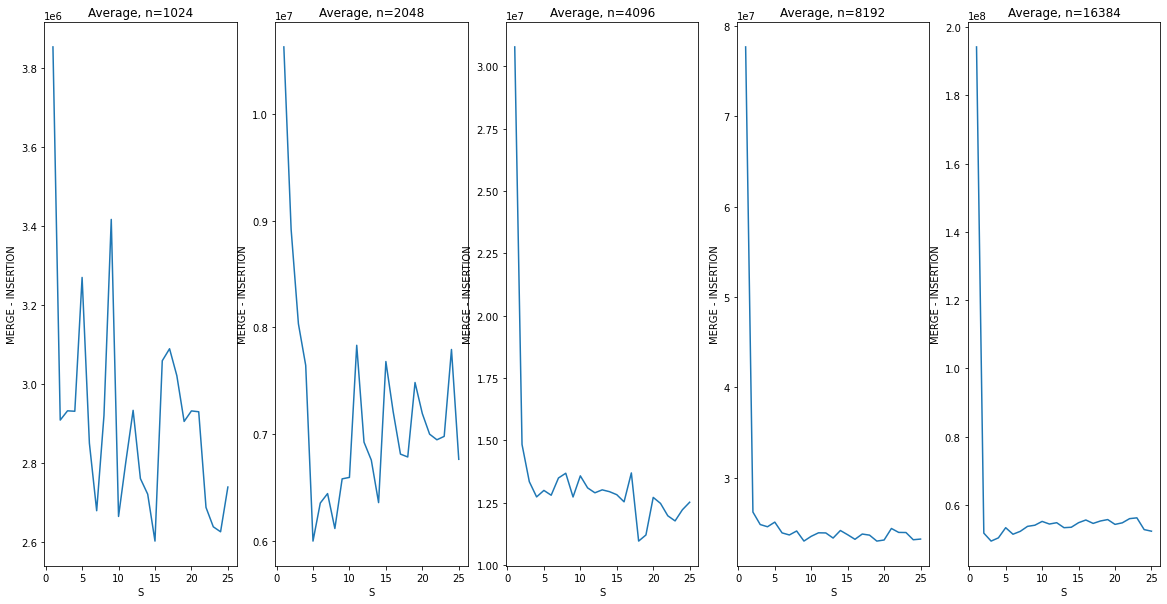

In [26]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np

# Plotting the graphs for visualisation
MIN_POW = 10
MAX_POW = 14
STEPS_POW = 1
LENGTHS_TO_TEST = [2**x for x in range(MIN_POW, MAX_POW+1, STEPS_POW)] # 2^8 = 256 and 2^19 = 524288
MAX_THRESH = 25
ITERATIONS = 100


fig, ax = plt.subplots(nrows=1, ncols=MAX_POW-MIN_POW+1, figsize=(20,10)) # 1 Row of many axes that differ based on array
x = np.arange(1, MAX_THRESH+1, 1)
# x_smooth = np.linspace(x.min(), x.max(), MAX_THRESH*50)

for j, n in enumerate(LENGTHS_TO_TEST):
    try:
        arr = np.load(f"./compare/average_n{n}.npy")
        # Create smooth line chart 
        y_smooth = savgol_filter(arr, 5, 3)

        ax[j].plot(x, arr)
        # ax[j].plot(x, y_smooth)
        ax[j].set_title(f"Average, n={n}")    
        ax[j].set_ylabel("MERGE - INSERTION")
        ax[j].set_xlabel("S")
        
    except Exception as e:
        print(e)

In [43]:
test_arr = [5,44,21,73,60]
hybrid_mergesort(test_arr, 0, len(test_arr)-1, 4)
print(test_arr)

[5, 21, 44, 60, 73]


In [28]:
def time_hybridSort(arr: list, S: int):
    # start = time.process_time_ns()
    start = time.perf_counter_ns()
    hybridSort(arr, S)
    # end = time.process_time_ns()
    end = time.perf_counter_ns()
    return end - start

In [31]:
def compare_2_average_case():
    np.random.seed(27)
    MIN_POW = 10
    MAX_POW = 14
    STEPS_POW = 1
    LENGTHS_TO_TEST = [2**x for x in range(MIN_POW, MAX_POW+1, STEPS_POW)] # 2^8 = 256 and 2^19 = 524288
    MAX_THRESH = 25
    ITERATIONS = 100
    ori_arr = np.random.randint(low=0, high=999, size=2**MAX_POW)

    for n in LENGTHS_TO_TEST:
        t = time.strftime('%H:%M:%S', time.localtime())
        print(f"Processing size = {n}. Start time = {t}.", end="... ")
        matrix = np.zeros([ITERATIONS, MAX_THRESH])
        for thresh in range(1, MAX_THRESH+1):
            for i in range(1, ITERATIONS+1):
                arr = ori_arr[:n] # copy the array to be sorted
                matrix[i-1][thresh-1] = time_hybridSort(arr, thresh)
        # After going through all threshes, find the mean value for each thresh across all iterations.
        thresh_timings = np.mean(matrix, axis=0)

        # For each n, save the thresh_timings for later plotting.
        np.save(f"./compare2/average_n{n}.npy", thresh_timings)
        t = time.strftime('%H:%M:%S', time.localtime())
        print(f"End time = {t}")

In [33]:
compare_2_average_case()

Processing size = 1024. Start time = 00:10:42.... End time = 00:11:03
Processing size = 2048. Start time = 00:11:03.... End time = 00:11:50
Processing size = 4096. Start time = 00:11:50.... End time = 00:13:35
Processing size = 8192. Start time = 00:13:35.... End time = 00:18:00
Processing size = 16384. Start time = 00:18:00.... End time = 00:26:24


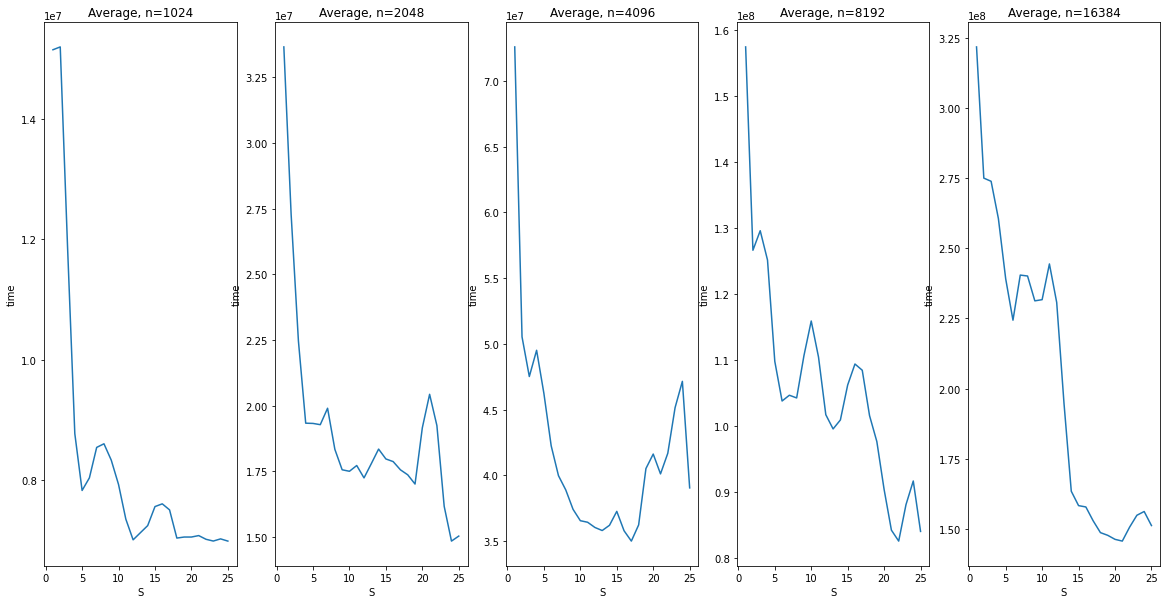

In [35]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np

# Plotting the graphs for visualisation
MIN_POW = 10
MAX_POW = 14
STEPS_POW = 1
LENGTHS_TO_TEST = [2**x for x in range(MIN_POW, MAX_POW+1, STEPS_POW)] # 2^8 = 256 and 2^19 = 524288
MAX_THRESH = 25
ITERATIONS = 100


fig, ax = plt.subplots(nrows=1, ncols=MAX_POW-MIN_POW+1, figsize=(20,10)) # 1 Row of many axes that differ based on array
x = np.arange(1, MAX_THRESH+1, 1)
# x_smooth = np.linspace(x.min(), x.max(), MAX_THRESH*50)

for j, n in enumerate(LENGTHS_TO_TEST):
    try:
        arr = np.load(f"./compare2/average_n{n}.npy")
        # Create smooth line chart 
        y_smooth = savgol_filter(arr, 5, 3)

        # ax[j].plot(x, arr)
        ax[j].plot(x, y_smooth)
        ax[j].set_title(f"Average, n={n}")    
        ax[j].set_ylabel("time")
        ax[j].set_xlabel("S")
        
    except Exception as e:
        print(e)

## (THIS DOESNT COMPARE WHAT WE WANT. CAN IGNORE) Average Case

In [8]:
def run_average_case():
    np.random.seed(27)
    MIN_POW = 10
    MAX_POW = 14
    STEPS_POW = 1
    # LENGTHS_TO_TEST = [2**x for x in range(MIN_POW, MAX_POW+1, STEPS_POW)] # 2^8 = 256 and 2^19 = 524288
    LENGTHS_TO_TEST = [2**14] # For generating this case only
    MAX_THRESH = 1000
    ITERATIONS = 100
    ori_arr = np.random.randint(low=0, high=999, size=2**MAX_POW)

    for n in LENGTHS_TO_TEST:
        t = time.strftime('%H:%M:%S', time.localtime())
        print(f"Processing size = {n}. Start time = {t}.", end="... ")
        matrix = np.zeros([ITERATIONS, MAX_THRESH])
        for thresh in range(1, MAX_THRESH+1):
            for i in range(1, ITERATIONS+1):
                arr = ori_arr[:n] # copy the array to be sorted 
                matrix[i-1][thresh-1] = time_hybridsort(arr, thresh)

        # After going through all threshes, find the mean value for each thresh across all iterations.
        thresh_timings = np.mean(matrix, axis=0)

        # For each n, save the thresh_timings for later plotting.
        np.save(f"./timings/average_n{n}.npy", thresh_timings)
        t = time.strftime('%H:%M:%S', time.localtime())
        print(f"End time = {t}")



In [9]:
run_average_case()

Processing size = 16384. Start time = 10:20:54.... End time = 11:13:36


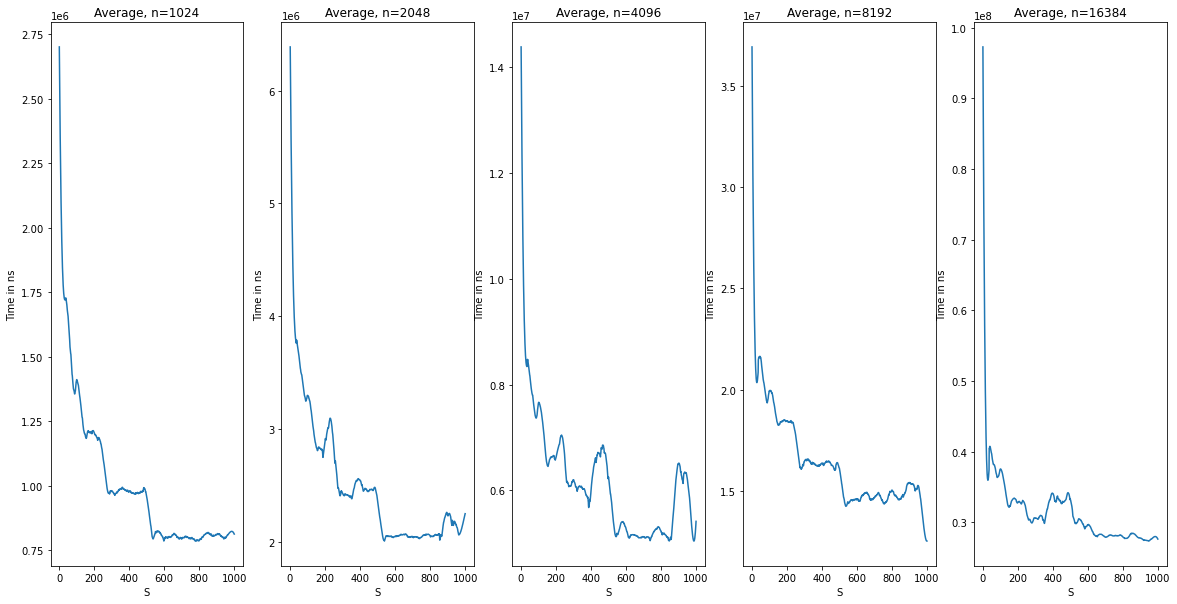

In [12]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import numpy as np

# Plotting the graphs for visualisation
MIN_POW = 10
MAX_POW = 14
STEPS_POW = 1
LENGTHS_TO_TEST = [2**x for x in range(MIN_POW, MAX_POW+1, STEPS_POW)] # 2^8 = 256 and 2^19 = 524288
MAX_THRESH = 1000
ITERATIONS = 100


fig, ax = plt.subplots(nrows=1, ncols=MAX_POW-MIN_POW+1, figsize=(20,10)) # 1 Row of many axes that differ based on array
x = np.arange(1, MAX_THRESH+1, 1)
# x_smooth = np.linspace(x.min(), x.max(), MAX_THRESH*50)

for j, n in enumerate(LENGTHS_TO_TEST):
    try:
        arr = np.load(f"./timings/average_n{n}.npy")
        # Create smooth line chart 
        y_smooth = savgol_filter(arr, 71, 3)

        # ax[j].plot(x, arr)
        ax[j].plot(x, y_smooth)
        ax[j].set_title(f"Average, n={n}")    
        ax[j].set_ylabel("Time in ns")
        ax[j].set_xlabel("S")
        
    except Exception as e:
        print(e)

In [22]:
def run_best_case():
    for pow in range(2, 6):
        N = 10**pow
        ITERS = 1
        MAX_THRESH = 20

        matrix = np.zeros([ITERS, MAX_THRESH])

        for i in range(ITERS):
            ori_arr = [x for x in range(N)]
            for thresh in range(1, MAX_THRESH+1):
                arr = ori_arr[:]  # make a copy
                # print(arr, end="")
                matrix[i][thresh-1] = time_hybridsort(arr, thresh)
                # print(f" --> {arr}")

        # Calculate average execution time for each threshold
        threshold_timings = np.mean(matrix, axis=0)

        # Save timings
        np.save(f"./timings/best_pow{pow}.npy", threshold_timings)

        print(threshold_timings)
        low = np.argmin(threshold_timings)
        print(
            f"Size=10^{pow}. Fastest at thresh={low+1} with speed {threshold_timings[low] / 1e9} seconds")

In [23]:
run_best_case()

[177100. 370400. 215800. 197100. 425000. 197700. 181900. 251600. 156500.
 172400. 172000. 156500. 140300. 154800. 139800. 140300. 139500. 144800.
 143300. 144100.]
Size=10^2. Fastest at thresh=17 with speed 0.0001395 seconds
[3119500. 2863000. 2951400. 1684900. 2429000. 2140800. 1415200. 2845300.
 1772100. 1822300. 1552600. 1746100. 1481500. 1571300. 2194300. 2307100.
 1536900.  958500. 1649500. 1589300.]
Size=10^3. Fastest at thresh=18 with speed 0.0009585 seconds
[31700200. 26155100. 24500600. 30695300. 22091500. 16759300. 16832500.
 22403700. 19881900. 15598800. 12756000. 14556900. 19435100. 25068900.
 18752200. 19819400. 14416400. 22273300. 19506100. 17787700.]
Size=10^4. Fastest at thresh=11 with speed 0.012756 seconds
[2.619913e+08 2.805270e+08 2.188978e+08 2.511301e+08 2.053759e+08
 1.902420e+08 1.515207e+08 2.513050e+08 1.920091e+08 1.519053e+08
 1.450633e+08 1.345428e+08 1.267054e+08 1.291750e+08 1.357250e+08
 1.318193e+08 1.790201e+08 1.394119e+08 1.304904e+08 1.278726e+08]
S

In [24]:
def run_worst_case():
    for pow in range(2, 6):
        N = 10**pow
        ITERS = 1
        MAX_THRESH = 20

        matrix = np.zeros([ITERS, MAX_THRESH])

        for i in range(ITERS):
            ori_arr = worstCaseArrayOfSize(N)
            for thresh in range(1, MAX_THRESH+1):
                arr = ori_arr[:]  # make a copy
                # print(arr, end="")
                matrix[i][thresh-1] = time_hybridsort(arr, thresh)
                # print(f" --> {arr}")

        # Calculate average execution time for each threshold
        threshold_timings = np.mean(matrix, axis=0)

        # Save timings
        np.save(f"./timings/worst_pow{pow}.npy", threshold_timings)

        print(threshold_timings)
        low = np.argmin(threshold_timings)
        print(
            f"Size=10^{pow}. Fastest at thresh={low+1} with speed {threshold_timings[low] / 1e9} seconds")
            
def worstCaseArrayOfSize(n):
    if n == 1:
        return [1]
    else:
        top = worstCaseArrayOfSize(int(math.floor(float(n) / 2)))
        bottom = worstCaseArrayOfSize(int(math.ceil(float(n) / 2)))
        return list(map(lambda x: x * 2, top)) + list(map(lambda x: x * 2 - 1, bottom))


In [25]:
run_worst_case()

[683300. 496900. 427600. 411000. 409900. 400600. 396300. 392800. 376900.
 375800. 385400. 378900. 378800. 401000. 379000. 386200. 377400. 377200.
 384200. 377500.]
Size=10^2. Fastest at thresh=10 with speed 0.0003758 seconds
[25403800. 28134800. 43573100. 22440200. 22365000. 22628900. 22815300.
 23972600. 24963000. 23998900. 22239300. 24383500. 45458900. 56735300.
 31541600. 28037600. 22333800. 22449700. 22521100. 27097500.]
Size=10^3. Fastest at thresh=11 with speed 0.0222393 seconds
[2.2910878e+09 2.2748045e+09 2.1767425e+09 2.5831276e+09 2.3659103e+09
 2.5800922e+09 2.2545559e+09 2.2082896e+09 2.0948837e+09 2.1012065e+09
 2.1856488e+09 2.1248728e+09 2.1357668e+09 2.2630197e+09 2.0886900e+09
 2.0683548e+09 2.0751453e+09 2.0853462e+09 2.0660220e+09 2.2821798e+09]
Size=10^4. Fastest at thresh=19 with speed 2.066022 seconds
[2.30225302e+11 2.31215545e+11 2.54907949e+11 2.51941601e+11
 2.50813479e+11 2.49789627e+11 2.70855736e+11 2.69820486e+11
 2.60679714e+11 2.44685127e+11 2.45575278e+

## Just comparing insertion sort vs merge sort for varying array size, N.

In [106]:
def compare_best_case():
    biggest_N = 10**3
    matrix = np.zeros(biggest_N)
    ori_arr = [x for x in range(biggest_N)]

    for N in range(1, biggest_N+1):

        arr = ori_arr[:N]  # make a copy
        merge_timing = time_mergesort(arr)
        arr = ori_arr[:N]  # make a copy
        insertion_timing = time_insertionsort(arr)

        # print(f"Merge timing: {merge_timing}")
        # print(f"Insertion timing: {insertion_timing}")
        print(N)
        if merge_timing < insertion_timing:
            print(f"Insertion was slower at N={N}.")

        relative_timing = (merge_timing - insertion_timing) / merge_timing * 100
        
        matrix[N-1] = relative_timing 

    # Save timings
    np.save(f"./timings/compare_best_size{N}.npy", matrix)

    # Desired N is when merge timing and insertion timing are almost equal.
    low = np.argmin(np.abs(matrix))
    print(
        f"Size={N}. Crossover point is at size={low+1}")

In [107]:
compare_best_case()

1
Insertion was slower at N=1.
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270

In [95]:
def compare_avr_case():
    matrix = np.zeros(8)

    for pow in range(1, 8):
        N = 10**pow
        ori_arr = np.random.randint(low=0, high=999, size=N)
        arr = ori_arr[:]  # make a copy
        merge_timing = time_mergesort(arr)
        arr = ori_arr[:]  # make a copy
        insertion_timing = time_insertionsort(arr)

        print(f"Merge timing: {merge_timing}")
        print(f"Insertion timing: {insertion_timing}")
        relative_timing = (merge_timing - insertion_timing) / merge_timing * 100
        
        matrix[pow-1] = relative_timing 
        
    # Save timings
    np.save(f"./timings/compare_best_pow{pow}.npy", matrix)

    print(matrix)

    # Desired N is when merge timing and insertion timing are almost equal.
    low = np.argmin(np.abs(matrix))
    print(
        f"Size=10^{pow}. Crossover point is at size={low+1}")

In [96]:
compare_avr_case()

Merge timing: 37500
Insertion timing: 8300
Merge timing: 1251400
Insertion timing: 81100
Merge timing: 77020800
Insertion timing: 930300
Merge timing: 6169533100
Insertion timing: 5570100


KeyboardInterrupt: 

In [77]:
test_arr = [x for x in range(100,0,-1)]
for i in range(5):
    arr = test_arr[:]
    arr.sort()
    print(arr)

print(test_arr)
mergetiming = time_mergesort(test_arr[:])
inserttiming = time_insertionsort(test_arr[:])

print(mergetiming)
print(inserttiming)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56